In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('air_quality.csv')
df.tail()

,Unnamed: 0,index,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
14532,14532,29526,Visakhapatnam,2020-06-27,14.36,31.22,4.02,9.79,12.50,7.79,0.39,7.23,19.40,0.40,1.272,42.0,Good
14533,14533,29527,Visakhapatnam,2020-06-28,27.89,59.04,7.97,15.98,20.52,11.90,0.74,7.87,26.76,0.76,2.140,76.0,Satisfactory
14534,14534,29528,Visakhapatnam,2020-06-29,27.89,59.04,7.97,15.98,20.52,11.90,0.74,7.87,26.76,0.76,2.140,76.0,Satisfactory
14535,14535,29529,Visakhapatnam,2020-06-30,27.89,59.04,7.97,15.98,20.52,11.90,0.74,7.87,26.76,0.76,2.140,76.0,Satisfactory
14536,14536,29530,Visakhapatnam,2020-07-01,14.36,31.22,4.02,9.79,12.50,7.79,0.39,7.23,19.40,0.40,1.272,42.0,Good


In [3]:
df.columns

Index(['Unnamed: 0', 'index', 'City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2',
       'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI',
       'AQI_Bucket'],
      dtype='object')

In [4]:
import pandasql as ps

In [6]:
q1 = """SELECT AQI FROM df where Date Like '2018%' """
q2 = """SELECT AQI FROM df where Date Like '2019%' """

q3 = """SELECT AQI FROM df where Date Like '2020-01%' """
q4 = """SELECT AQI FROM df where Date Like '2020-02%' """
q5 = """SELECT AQI FROM df where Date Like '2020-03%' """
q6 = """SELECT AQI FROM df where Date Like '2020-04%' """
q7 = """SELECT AQI FROM df where Date Like '2020-05%' """
q8 = """SELECT AQI FROM df where Date Like '2020-06%' """
q9 = """SELECT AQI FROM df where Date Like '2020-07%' """

# 1. Pre-Covid(July 2018 to Feb 2020) and Post Covid(March 2020 to July 2020) AQI Analysis

In [7]:
AQIpre = pd.concat([ps.sqldf(q1, locals()) , ps.sqldf(q2, locals()) , ps.sqldf(q3, locals()) , ps.sqldf(q4, locals())],
                   ignore_index=True)

In [8]:
AQIpost = pd.concat([ps.sqldf(q5, locals()) , ps.sqldf(q6, locals()) , ps.sqldf(q7, locals()) , ps.sqldf(q8, locals()),
                    ps.sqldf(q9, locals())],ignore_index=True)

In [9]:
avg_AQIpre = AQIpre.mean(axis=0)
print(avg_AQIpre)

AQI    152.723271
dtype: float64


In [10]:
avg_AQIpost = AQIpost.mean(axis=0)
print(avg_AQIpost)

AQI    91.002815
dtype: float64


In [11]:
decrease_percentage = ((avg_AQIpre - avg_AQIpost)/avg_AQIpre)*100

print(decrease_percentage)

AQI    40.413262
dtype: float64


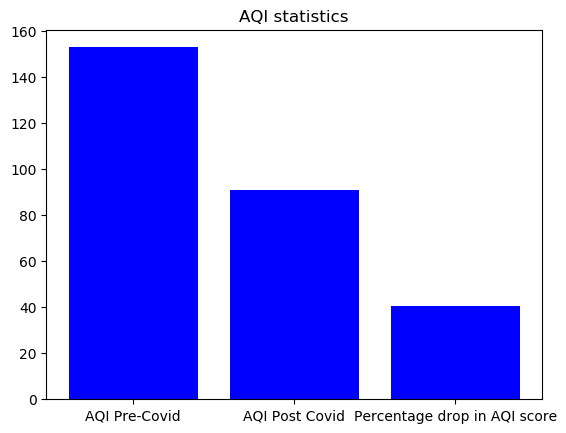

In [13]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

objects = ('AQI Pre-Covid','AQI Post Covid','Percentage drop in AQI score')
y_pos = np.arange(len(objects))
y = [152.723271,91.002815,40.413262]

#plt.bar(y_pos, y[0], align='center', color='r', alpha=0.5)
#plt.bar(y_pos, y[1], align='center', color='y', alpha=0.5)
plt.bar(y_pos, y, align='center', color='b', alpha=1)

plt.xticks(y_pos, objects)
#plt.ylabel('Usage')
plt.title('AQI statistics')

plt.show()

# 2. Pre-Covid(July 2018 to Feb 2020) and Post Covid(March 2020 to July 2020) O3 Analysis

In [15]:
q1 = """SELECT O3 FROM df where Date Like '2018%' """
q2 = """SELECT O3 FROM df where Date Like '2019%' """

q3 = """SELECT O3 FROM df where Date Like '2020-01%' """
q4 = """SELECT O3 FROM df where Date Like '2020-02%' """
q5 = """SELECT O3 FROM df where Date Like '2020-03%' """
q6 = """SELECT O3 FROM df where Date Like '2020-04%' """
q7 = """SELECT O3 FROM df where Date Like '2020-05%' """
q8 = """SELECT O3 FROM df where Date Like '2020-06%' """
q9 = """SELECT O3 FROM df where Date Like '2020-07%' """

In [16]:
O3pre = pd.concat([ps.sqldf(q1, locals()) , ps.sqldf(q2, locals()) , ps.sqldf(q3, locals()) , ps.sqldf(q4, locals())],
                   ignore_index=True)

In [17]:
O3post = pd.concat([ps.sqldf(q5, locals()) , ps.sqldf(q6, locals()) , ps.sqldf(q7, locals()) , ps.sqldf(q8, locals()),
                    ps.sqldf(q9, locals())],ignore_index=True)

In [18]:
avg_O3pre = O3pre.mean(axis=0)
print(avg_O3pre)

O3    31.684494
dtype: float64


In [19]:
avg_O3post = O3post.mean(axis=0)
print(avg_O3post)

O3    28.75875
dtype: float64


In [20]:
decrease_percentage = ((avg_O3pre - avg_O3post)/avg_O3pre)*100

print(decrease_percentage)

O3    9.233991
dtype: float64


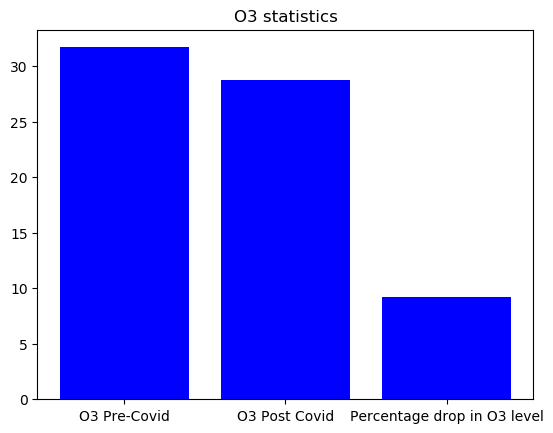

In [22]:
objects = ('O3 Pre-Covid','O3 Post Covid','Percentage drop in O3 level')
y_pos = np.arange(len(objects))
y = [31.684494,28.75875,9.233991]

#plt.bar(y_pos, y[0], align='center', color='r', alpha=0.5)
#plt.bar(y_pos, y[1], align='center', color='y', alpha=0.5)
plt.bar(y_pos, y, align='center', color='b', alpha=1)

plt.xticks(y_pos, objects)
#plt.ylabel('Usage')
plt.title('O3 statistics')

plt.show()

# 3. Pre-Covid(July 2018 to Feb 2020) and Post Covid(March 2020 to July 2020) SO2 Analysis

In [23]:
q1 = """SELECT SO2 FROM df where Date Like '2018%' """
q2 = """SELECT SO2 FROM df where Date Like '2019%' """

q3 = """SELECT SO2 FROM df where Date Like '2020-01%' """
q4 = """SELECT SO2 FROM df where Date Like '2020-02%' """
q5 = """SELECT SO2 FROM df where Date Like '2020-03%' """
q6 = """SELECT SO2 FROM df where Date Like '2020-04%' """
q7 = """SELECT SO2 FROM df where Date Like '2020-05%' """
q8 = """SELECT SO2 FROM df where Date Like '2020-06%' """
q9 = """SELECT SO2 FROM df where Date Like '2020-07%' """

In [24]:
SO2pre = pd.concat([ps.sqldf(q1, locals()) , ps.sqldf(q2, locals()) , ps.sqldf(q3, locals()) , ps.sqldf(q4, locals())],
                   ignore_index=True)

In [25]:
SO2post = pd.concat([ps.sqldf(q5, locals()) , ps.sqldf(q6, locals()) , ps.sqldf(q7, locals()) , ps.sqldf(q8, locals()),
                    ps.sqldf(q9, locals())],ignore_index=True)

In [26]:
avg_SO2pre = SO2pre.mean(axis=0)
print(avg_SO2pre)

SO2    12.036758
dtype: float64


In [27]:
avg_SO2post = SO2post.mean(axis=0)
print(avg_SO2post)

SO2    8.882989
dtype: float64


In [28]:
decrease_percentage = ((avg_SO2pre - avg_SO2post)/avg_SO2pre)*100

print(decrease_percentage)

SO2    26.201149
dtype: float64


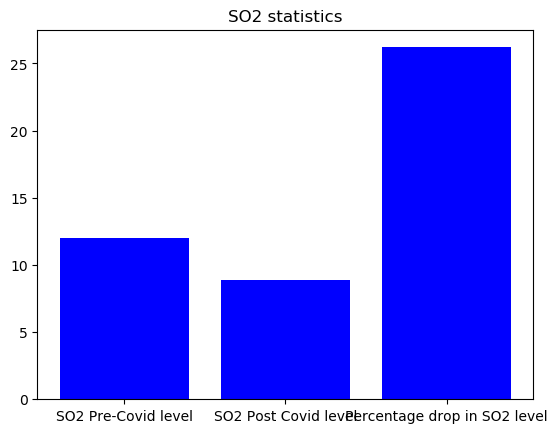

In [29]:
objects = ('SO2 Pre-Covid level','SO2 Post Covid level','Percentage drop in SO2 level')
y_pos = np.arange(len(objects))
y = [12.036758,8.882989,26.201149]

plt.bar(y_pos, y, align='center', color='b', alpha=1)

plt.xticks(y_pos, objects)
#plt.ylabel('Usage')
plt.title('SO2 statistics')

plt.show()

# 4. Pre-Covid(July 2018 to Feb 2020) and Post Covid(March 2020 to July 2020) NO2 Analysis

In [30]:
q1 = """SELECT NO2 FROM df where Date Like '2018%' """
q2 = """SELECT NO2 FROM df where Date Like '2019%' """

q3 = """SELECT NO2 FROM df where Date Like '2020-01%' """
q4 = """SELECT NO2 FROM df where Date Like '2020-02%' """
q5 = """SELECT NO2 FROM df where Date Like '2020-03%' """
q6 = """SELECT NO2 FROM df where Date Like '2020-04%' """
q7 = """SELECT NO2 FROM df where Date Like '2020-05%' """
q8 = """SELECT NO2 FROM df where Date Like '2020-06%' """
q9 = """SELECT NO2 FROM df where Date Like '2020-07%' """

In [31]:
NO2pre = pd.concat([ps.sqldf(q1, locals()) , ps.sqldf(q2, locals()) , ps.sqldf(q3, locals()) , ps.sqldf(q4, locals())],
                   ignore_index=True)

In [32]:
NO2post = pd.concat([ps.sqldf(q5, locals()) , ps.sqldf(q6, locals()) , ps.sqldf(q7, locals()) , ps.sqldf(q8, locals()),
                    ps.sqldf(q9, locals())],ignore_index=True)

In [33]:
avg_NO2pre = NO2pre.mean(axis=0)
print(avg_NO2pre)

NO2    26.199369
dtype: float64


In [34]:
avg_NO2post = NO2post.mean(axis=0)
print(avg_NO2post)

NO2    18.226538
dtype: float64


In [35]:
decrease_percentage = ((avg_NO2pre - avg_NO2post)/avg_NO2pre)*100

print(decrease_percentage)

NO2    30.431383
dtype: float64


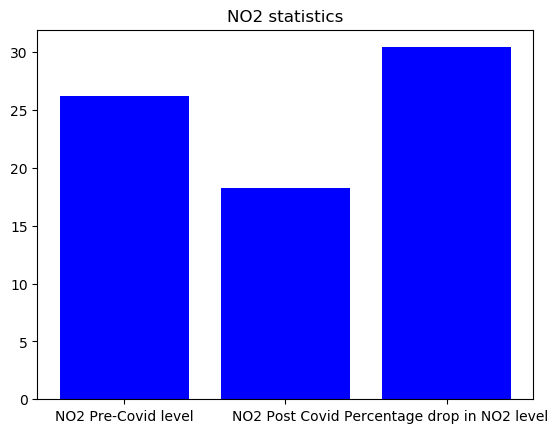

In [37]:
objects = ('NO2 Pre-Covid level','NO2 Post Covid','Percentage drop in NO2 level')
y_pos = np.arange(len(objects))
y = [26.199369,18.226538,30.431383]

plt.bar(y_pos, y, align='center', color='b', alpha=1)

plt.xticks(y_pos, objects)
plt.title('NO2 statistics')

plt.show()

# 5. Pre-Covid(July 2018 to Feb 2020) and Post Covid(March 2020 to July 2020) CO Analysis

In [38]:
q1 = """SELECT CO FROM df where Date Like '2018%' """
q2 = """SELECT CO FROM df where Date Like '2019%' """

q3 = """SELECT CO FROM df where Date Like '2020-01%' """
q4 = """SELECT CO FROM df where Date Like '2020-02%' """
q5 = """SELECT CO FROM df where Date Like '2020-03%' """
q6 = """SELECT CO FROM df where Date Like '2020-04%' """
q7 = """SELECT CO FROM df where Date Like '2020-05%' """
q8 = """SELECT CO FROM df where Date Like '2020-06%' """
q9 = """SELECT CO FROM df where Date Like '2020-07%' """

In [39]:
COpre = pd.concat([ps.sqldf(q1, locals()) , ps.sqldf(q2, locals()) , ps.sqldf(q3, locals()) , ps.sqldf(q4, locals())],
                   ignore_index=True)

In [40]:
COpost = pd.concat([ps.sqldf(q5, locals()) , ps.sqldf(q6, locals()) , ps.sqldf(q7, locals()) , ps.sqldf(q8, locals()),
                    ps.sqldf(q9, locals())],ignore_index=True)

In [41]:
avg_COpre = COpre.mean(axis=0)
print(avg_COpre)

CO    2.176367
dtype: float64


In [42]:
avg_COpost = COpost.mean(axis=0)
print(avg_COpost)

CO    0.801356
dtype: float64


In [43]:
decrease_percentage = ((avg_COpre - avg_COpost)/avg_COpre)*100

print(decrease_percentage)

CO    63.179179
dtype: float64


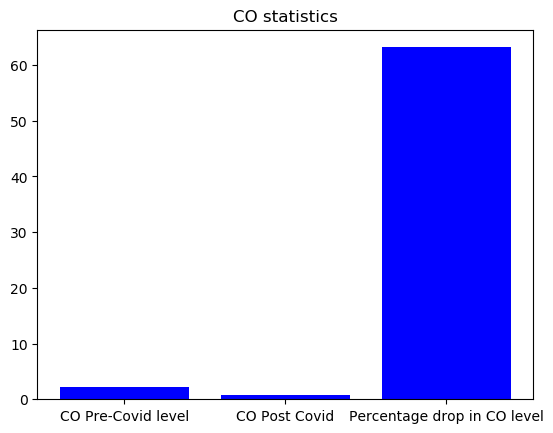

In [44]:
objects = ('CO Pre-Covid level','CO Post Covid','Percentage drop in CO level')
y_pos = np.arange(len(objects))
y = [2.176367,0.801356,63.179179]

plt.bar(y_pos, y, align='center', color='b', alpha=1)

plt.xticks(y_pos, objects)
plt.title('CO statistics')

plt.show()

# 6. Pre-Covid(July 2018 to Feb 2020) and Post Covid(March 2020 to July 2020) PM10 Analysis

In [45]:
q1 = """SELECT PM10 FROM df where Date Like '2018%' """
q2 = """SELECT PM10 FROM df where Date Like '2019%' """

q3 = """SELECT PM10 FROM df where Date Like '2020-01%' """
q4 = """SELECT PM10 FROM df where Date Like '2020-02%' """
q5 = """SELECT PM10 FROM df where Date Like '2020-03%' """
q6 = """SELECT PM10 FROM df where Date Like '2020-04%' """
q7 = """SELECT PM10 FROM df where Date Like '2020-05%' """
q8 = """SELECT PM10 FROM df where Date Like '2020-06%' """
q9 = """SELECT PM10 FROM df where Date Like '2020-07%' """

In [46]:
PMpre = pd.concat([ps.sqldf(q1, locals()) , ps.sqldf(q2, locals()) , ps.sqldf(q3, locals()) , ps.sqldf(q4, locals())],
                   ignore_index=True)

In [47]:
PMpost = pd.concat([ps.sqldf(q5, locals()) , ps.sqldf(q6, locals()) , ps.sqldf(q7, locals()) , ps.sqldf(q8, locals()),
                    ps.sqldf(q9, locals())],ignore_index=True)

In [48]:
avg_PMpre = PMpre.mean(axis=0)
print(avg_PMpre)

PM10    118.4348
dtype: float64


In [49]:
avg_PMpost = PMpost.mean(axis=0)
print(avg_PMpost)

PM10    76.868356
dtype: float64


In [51]:
decrease_percentage = ((avg_PMpre - avg_PMpost)/avg_PMpre)*100

print(decrease_percentage)

PM10    35.096479
dtype: float64


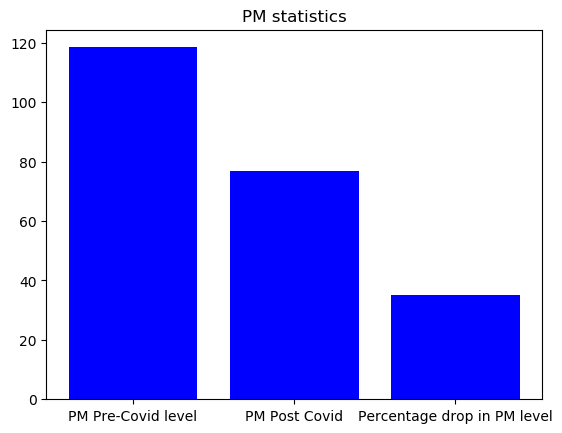

In [52]:
objects = ('PM Pre-Covid level','PM Post Covid','Percentage drop in PM level')
y_pos = np.arange(len(objects))
y = [118.4348,76.868356,35.096479]

plt.bar(y_pos, y, align='center', color='b', alpha=1)

plt.xticks(y_pos, objects)
plt.title('PM statistics')

plt.show()

# 7.  Pre-Covid(July 2018 to Feb 2020) and Post Covid(March 2020 to July 2020) PM2.5 Analysis

In [5]:
df.rename(columns = {'PM2.5':'PM2'}, inplace = True)

In [6]:
df.columns

Index(['Unnamed: 0', 'index', 'City', 'Date', 'PM2', 'PM10', 'NO', 'NO2',
       'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI',
       'AQI_Bucket'],
      dtype='object')

In [7]:
q1 = """SELECT PM2 FROM df where Date Like '2018%' """
q2 = """SELECT PM2 FROM df where Date Like '2019%' """

q3 = """SELECT PM2 FROM df where Date Like '2020-01%' """
q4 = """SELECT PM2 FROM df where Date Like '2020-02%' """
q5 = """SELECT PM2 FROM df where Date Like '2020-03%' """
q6 = """SELECT PM2 FROM df where Date Like '2020-04%' """
q7 = """SELECT PM2 FROM df where Date Like '2020-05%' """
q8 = """SELECT PM2 FROM df where Date Like '2020-06%' """
q9 = """SELECT PM2 FROM df where Date Like '2020-07%' """

In [8]:
PM2pre = pd.concat([ps.sqldf(q1, locals()) , ps.sqldf(q2, locals()) , ps.sqldf(q3, locals()) , ps.sqldf(q4, locals())],
                   ignore_index=True)

In [9]:
PM2post = pd.concat([ps.sqldf(q5, locals()) , ps.sqldf(q6, locals()) , ps.sqldf(q7, locals()) , ps.sqldf(q8, locals()),
                    ps.sqldf(q9, locals())],ignore_index=True)

In [10]:
avg_PM2pre = PM2pre.mean(axis=0)
print(avg_PM2pre)

PM2    57.874565
dtype: float64


In [11]:
avg_PM2post = PM2post.mean(axis=0)
print(avg_PM2post)

PM2    35.985728
dtype: float64


In [12]:
decrease_percentage = ((avg_PM2pre - avg_PM2post)/avg_PM2pre)*100

print(decrease_percentage)

PM2    37.821169
dtype: float64


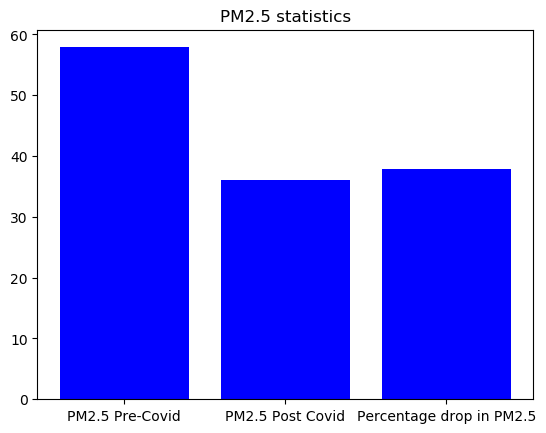

In [15]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

objects = ('PM2.5 Pre-Covid','PM2.5 Post Covid','Percentage drop in PM2.5')
y_pos = np.arange(len(objects))
y = [57.874565,35.985728,37.821169]

#plt.bar(y_pos, y[0], align='center', color='r', alpha=0.5)
#plt.bar(y_pos, y[1], align='center', color='y', alpha=0.5)
plt.bar(y_pos, y, align='center', color='b', alpha=1)

plt.xticks(y_pos, objects)
#plt.ylabel('Usage')
plt.title('PM2.5 statistics')

plt.show()

# 8.  Pre-Covid(July 2018 to Feb 2020) and Post Covid(March 2020 to July 2020) Benzene Analysis

In [16]:
q1 = """SELECT Benzene FROM df where Date Like '2018%' """
q2 = """SELECT Benzene FROM df where Date Like '2019%' """

q3 = """SELECT Benzene FROM df where Date Like '2020-01%' """
q4 = """SELECT Benzene FROM df where Date Like '2020-02%' """
q5 = """SELECT Benzene FROM df where Date Like '2020-03%' """
q6 = """SELECT Benzene FROM df where Date Like '2020-04%' """
q7 = """SELECT Benzene FROM df where Date Like '2020-05%' """
q8 = """SELECT Benzene FROM df where Date Like '2020-06%' """
q9 = """SELECT Benzene FROM df where Date Like '2020-07%' """

In [17]:
pre = pd.concat([ps.sqldf(q1, locals()) , ps.sqldf(q2, locals()) , ps.sqldf(q3, locals()) , ps.sqldf(q4, locals())],
                   ignore_index=True)

In [18]:
post = pd.concat([ps.sqldf(q5, locals()) , ps.sqldf(q6, locals()) , ps.sqldf(q7, locals()) , ps.sqldf(q8, locals()), ps.sqldf(q9, locals())],
                   ignore_index=True)

In [19]:
avg_post = post.mean(axis=0)
print(avg_post)

Benzene    1.005601
dtype: float64


In [20]:
avg_pre = pre.mean(axis=0)
print(avg_pre)

Benzene    1.566395
dtype: float64


In [21]:
decrease_percentage = ((avg_pre - avg_post)/avg_pre)*100

print(decrease_percentage)

Benzene    35.80153
dtype: float64


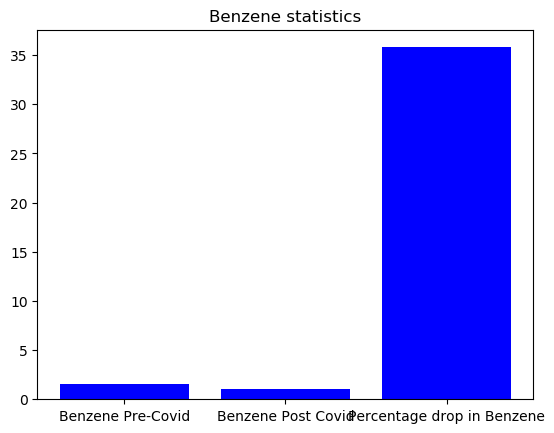

In [24]:

objects = ('Benzene Pre-Covid','Benzene Post Covid','Percentage drop in Benzene')
y_pos = np.arange(len(objects))
y = [1.566395,1.005601,35.80153]

#plt.bar(y_pos, y[0], align='center', color='r', alpha=0.5)
#plt.bar(y_pos, y[1], align='center', color='y', alpha=0.5)
plt.bar(y_pos, y, align='center', color='b', alpha=1)

plt.xticks(y_pos, objects)
#plt.ylabel('Usage')
plt.title('Benzene statistics')

plt.show()